In [1]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

# Pythonで音声を扱う
## Librosaとは
音声（音楽）分析のための Python のライブラリ

* 公式：https://librosa.org/doc/latest/index.html



## 入力と出力
音声を読み込んで、出力し、保存してみましょう。

Google Colab で librosa を使う
```
import librosa
```

より詳細に扱いたい場合はsoundfileを使う
```
import soundfile as sf
```

1. Google driveに音声をアップロード
2. librosa.load()にアップロードした音声のPathを渡す
3. IPython.display()で出力
4. matplotlibでグラフ描画
5. soundfile.write()で別名で保存
6. 保存されていることを確認

[サンプル音声](https://www.notion.so/shunsawada/3c55650603ea40a58414c6b9131aaa0f?pvs=4#4fad4e5ce5b7410cbea1e8205f8c2b36)






### 音声の読み込み：librosa.load() / soudfile.read()
■ librosa.load()

```
y, sr = librosa.load(path)
```

https://librosa.org/doc/latest/generated/librosa.load.html?highlight=load

* y: オーディオの時系列データ
  - np.ndarray [shape=(n,) or (2, n)]
* sr: サンプリングレート

■ soudfile.read()

SoundFileは音声を扱うライブラリの一つ
https://pysoundfile.readthedocs.io/en/latest/
https://pysoundfile.readthedocs.io/en/latest/index.html?highlight=write#soundfile.SoundFile
```
y, sr = sf.read(path)
```

* y: オーディオの時系列データ
  - np.ndarray
* sr: サンプリングレート

※ librosaが (nb_channels, nb_samples) に対して，soundfileは (nb_samples, nb_channels)



### 音声の出力：IPython.display.Audio()

Google Colabに表示：

```
import IPython.display

IPython.display.Audio(data=None, filename=None, url=None, embed=None, rate=None, autoplay=False)
```

https://ipython.org/ipython-doc/3/api/generated/IPython.display.html

### 音声のグラフ描画：matplotlib.pyplot / librosa.display.waveplot
* matplotlib
```
import matplotlib.pyplot as plt
```
* librosa.display.waveplot
```
import librosa.display
```

どちらを用いてもよい。

librosa.displayだと軸などをよしなに設定してくれるが、細かい設定をしたい場合matplotlibを使用する。


### 音声の保存：soudfile.write()

```
import soundfile as sf

sf.write(path, data, samplerate)
```

librosaでの保存もできるが。。。
https://librosa.org/doc/0.7.2/generated/librosa.output.write_wav.html

浮動小数点のWAV形式でしか保存できない

さらに

```
Warning

This function is deprecated in librosa 0.7.0.
It will be removed in 0.8.
Usage of write_wav should be replaced by soundfile.write.

```

サンプル音声を読み込んでサンプリングレートを上げて保存する

44100


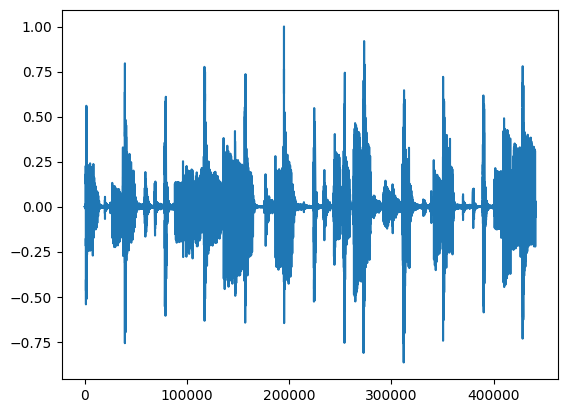

In [ ]:
import librosa
import IPython.display # Notebookに埋め込むために使用
import matplotlib.pyplot as plt
import soundfile as sf
import numpy as np

path = "/content/drive/MyDrive/Colab Notebooks/dataset/"

y, sr = librosa.load(path + "audio_sample.wav", sr = 44100)
print(sr)

display(IPython.display.Audio(y, rate=sr))

plt.plot(np.arange(len(y)), y)

# 44.1kHzでサンプリングされているものを
# 2倍のサンプリング周波数（88.2kHz）でサンプリングされているものとしている
display(IPython.display.Audio(y, rate=88200))
sf.write(path + "audio_sample_out_low.wav", y, 88200)


## フーリエ変換


### 波形を生成

[0.000e+00 1.000e-03 2.000e-03 ... 1.007e+00 1.008e+00 1.009e+00]
[0.         0.01884844 0.03769018 ... 0.13156436 0.15022559 0.16883344]


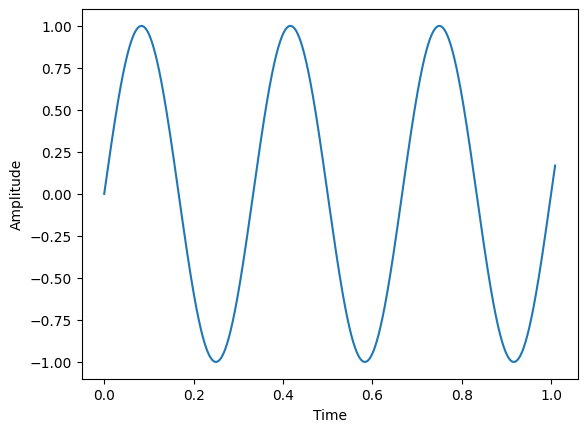

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display # Notebookに埋め込むために使用

# サンプリング周波数 (Hz)
fs = 1000

# 基本周波数 (Hz)
f0 = 3

# サンプリング周期
dt = 1.0/fs

# 生成サンプル時間
sec = 1

# 生成サンプル数
N = sec * fs

# 時間軸の作成
t = np.arange(0, N*dt+0.01, dt)
print(t)
# arange(start, stop, step)
# start ≦ n < stop, をstepの間隔

# 信号を生成
f = np.sin(2*np.pi*f0*t)
print(f)

plt.plot(t, f)
plt.xlabel("Time")
plt.ylabel("Amplitude")
#plt.grid()

# オーディオを表示する
display(IPython.display.Audio(data = f, rate=fs))


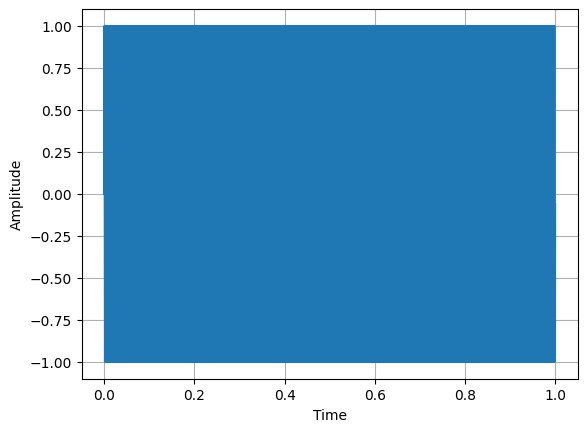

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display # Notebookに埋め込むために使用

# サンプリング周波数 (Hz)
# 3000以上
fs = 44100

# 基本周波数 (Hz)
f0 = 440

# サンプリング周期
dt = 1.0/fs

# 生成サンプル時間
sec = 1

# 生成サンプル数
N = sec * fs

# 時間軸の作成
t = np.arange(0, N*dt, dt)
# arange(start, stop, step)
# start ≦ n < stop, をstepの間隔

# 信号を生成
f = np.sin(2*np.pi*f0*t)

plt.plot(t, f)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid()

# オーディオを表示する
display(IPython.display.Audio(data = f, rate=fs))

### 高速フーリエ変換 (fast Fourier transform: FFT)


numpy:
```
np.fft.fft(a, n=None, axis=- 1, norm=None)
```

https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html

FFTを行って得られるパワースペクトルはナイキスト周波数を境にして左右対称になる
-> 右半分は不要


dt: 0.0003333333333333333
N: 6000
df: 0.5
F.shape: (6000,)


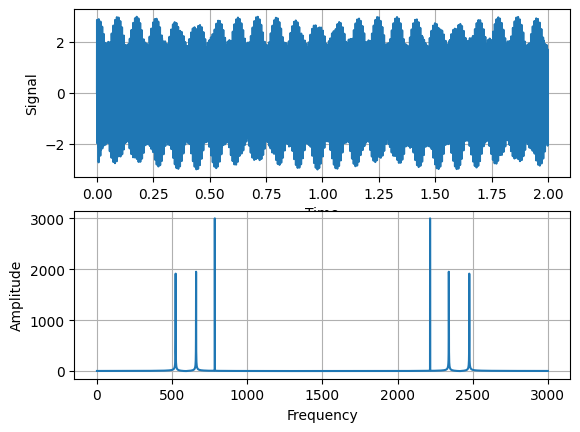

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display # Notebookに埋め込むために使用
import librosa

# サンプリング周波数 (Hz)
fs =3000
#fs = 1000 # ナイキスト以下
# サンプリング周期
dt = 1.0/fs

# 生成サンプル時間
sec = 2

# 生成サンプル数
N = sec * fs

print("dt:",dt)
print("N:", N)

# 時間軸
t = np.arange(0, N*dt, dt)
# arange(start, stop, step)
# start ≦ n < stop, をstepの間隔

# 周波数軸
freq = np.linspace(0, fs, N) # numpy.fft
# linspace(start, stop, num)
# start ≦ n < stop、を要素数num

# 周波数分解能 df = 1/sec = fs/N
# fs [sample / s]

df = fs/N
print("df:",df)

# freq = np.arange(0, fs, df) と書くこともできる

# tはこのようにも書ける
# t = np.linspace(0, N*dt, N)

f1 = 523.251 # C
f2 = 659.255 # E
f3 = 783.991 # G


# 信号を生成
f = np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t) + np.sin(2*np.pi*f3*t)

# 高速フーリエ変換
F = np.fft.fft(f)
print("F.shape:", F.shape)

# 振幅スペクトルを計算
Amp = np.abs(F)

plt.figure()
plt.subplot(211)
plt.plot(t, f)
plt.xlabel("Time")
plt.ylabel("Signal")
plt.grid()
plt.subplot(212)
plt.plot(freq, Amp)
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

np_f = np.array(f)

display(IPython.display.Audio(data = np_f, rate=fs)) # オーディオを表示する





### 短時間フーリエ変換 (short-time Fourier transform: STFT)
時系列のデータに対して窓幅NのFFTをシフト幅分ずらしながら連続的に行う
-> 周波数の時間変化をとらえることができる

窓幅 (window size) / シフト幅 (hop_length)

上セルのFFTは窓幅 ＝ サンプルサイズになっている

* 窓幅を大きくすると周波数分解能が上がるが，時間分解能がさがる

* シフト幅を小さくすると時間分解能が上がる

* 周波数分解能と時間分解能はトレードオフ


```
librosa.stft(y, n_fft=2048, hop_length=None, win_length=None, window='hann', center=True, dtype=None, pad_mode='reflect')
```
* n_fft: fftの窓幅 (デフォルト値はn_fft=2048)
* hop_length: シフト幅 (hop_length=n_fft/4)
* win_length: 窓幅 (win_length=n_fftで、win_length<=n_fft)
  - 大きさをn_fft以下にすると0でパディング（０埋め）される
* window: 窓関数

https://librosa.org/doc/latest/generated/librosa.stft.html?highlight=stft#librosa.stft


### スペクトログラムの描画
スペクトログラム：横軸が時間，縦軸が周波数，画素値が周波数の強さを表す。

縦軸のスケールをlogにしているのは倍音が等間隔に並ぶため

```
librosa.display.specshow(data, x_coords=None, y_coords=None, x_axis=None, y_axis=None, sr=22050, hop_length=512, fmin=None, fmax=None, tuning=0.0, bins_per_octave=12, key='C:maj', Sa=None, mela=None, thaat=None, auto_aspect=True, htk=False, ax=None, **kwargs)
```

https://librosa.org/doc/latest/generated/librosa.display.specshow.html?highlight=spec%20show#librosa.display.specshow


sr: 44100
len(y): 441000


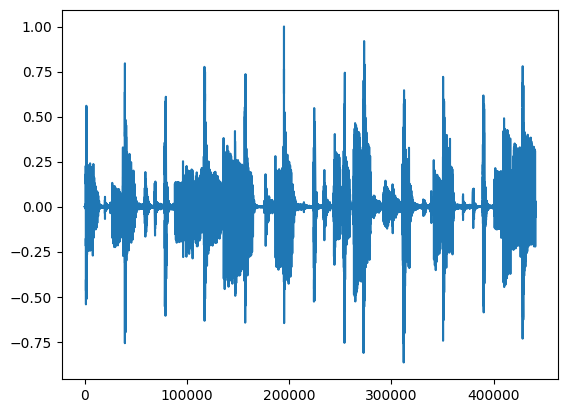

len(F): 441000
df: 0.1
D.shape: (4097, 431)
df: 5.38330078125


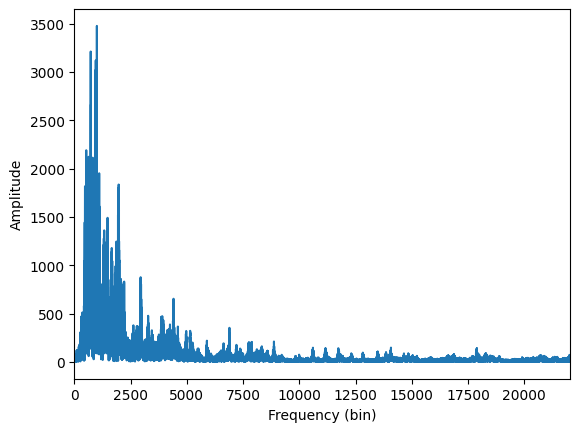

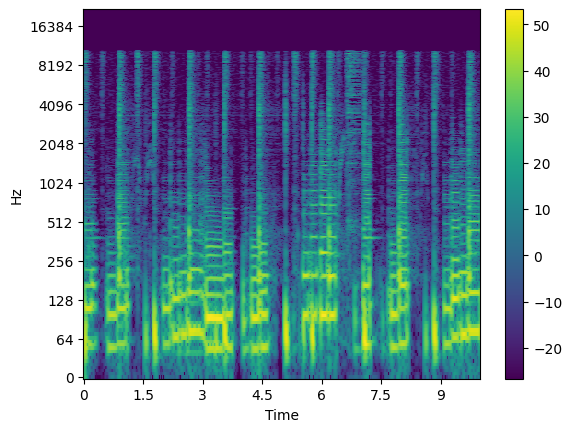

In [ ]:
import librosa
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

path = "/content/drive/MyDrive/Colab Notebooks/dataset/"

y, sr = librosa.load(path + "audio_sample.wav", sr = 44100)

print("sr:", sr)

# amplitude
print("len(y):",len(y)) # (sr * sec)
plt.plot(np.arange(len(y)), y)
plt.show()

# FFT
F = np.fft.fft(y)
print("len(F):", len(F))
Amp = np.abs(F)
plt.xlim([0,sr/2])
plt.xlabel('Frequency (bin)')
plt.ylabel('Amplitude')
plt.plot(np.arange(len(y)), Amp)
# 周波数分解能 df = 1/T (Tは窓幅の時間) …(1)
# 時間窓長 T = N * dt = N / sr = 10 (Nは窓のサンプル数) …(2)
# NはFFTのデータ点数と等しくなる
# (1), (2)より
# df = sr / N
print("df:", sr/len(y))

# STFT
plt.figure()
nfft = 2048 * 4
D = librosa.amplitude_to_db(np.abs(librosa.stft(y, hop_length=1024, n_fft = nfft)))
librosa.display.specshow(D, y_axis='log', sr=sr, hop_length=1024, x_axis='time', cmap='viridis')
plt.colorbar()

# df = sr / N
print("D.shape:", D.shape)
print("df:", sr/nfft)

sr: 44100
len(y): 441000


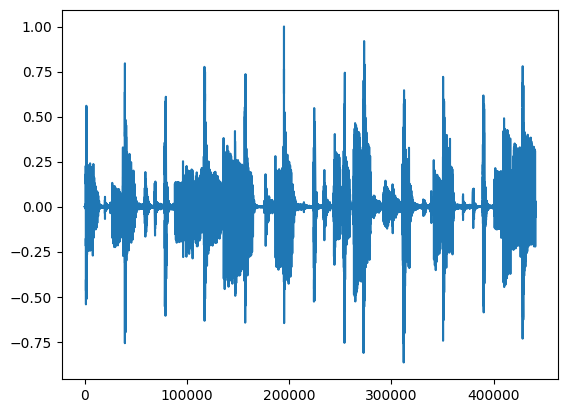

len(F): 441000
df: 0.1
D.shape: (257, 862)
df: 5.38330078125


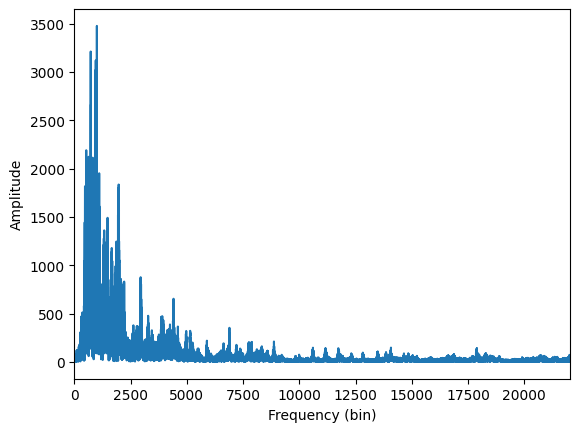

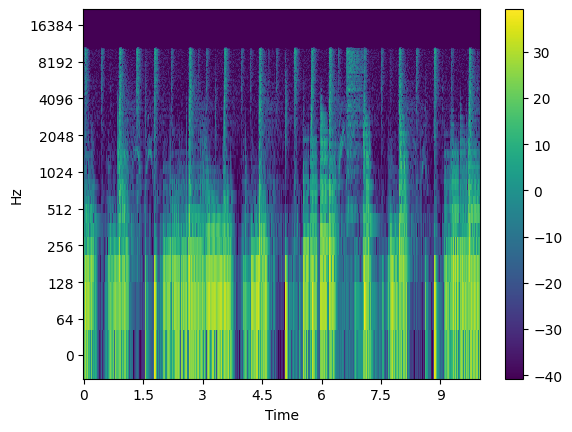

In [ ]:
import librosa
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

path = "/content/drive/MyDrive/Colab Notebooks/dataset/"

y, sr = librosa.load(path + "audio_sample.wav", sr = 44100)

print("sr:", sr)

# amplitude
print("len(y):",len(y)) # (sr * sec)
plt.plot(np.arange(len(y)), y)
plt.show()

# FFT
F = np.fft.fft(y)
print("len(F):", len(F))
Amp = np.abs(F)
plt.xlim([0,sr/2])
plt.xlabel('Frequency (bin)')
plt.ylabel('Amplitude')
plt.plot(np.arange(len(y)), Amp)
# 周波数分解能 df = 1/T (Tは窓幅の時間) …(1)
# 時間窓長 T = N * dt = N / sr = 10 (Nは窓のサンプル数) …(2)
# NはFFTのデータ点数と等しくなる
# (1), (2)より
# df = sr / N
print("df:", sr/len(y))

# STFT
plt.figure()
nfft = 2048 * 4
D = librosa.amplitude_to_db(np.abs(librosa.stft(y, hop_length=nfft, n_fft = nfft)))
librosa.display.specshow(D, y_axis='log', sr=sr, hop_length=nfft, x_axis='time', cmap='viridis')
plt.colorbar()

# df = sr / N
print("D.shape:", D.shape)
print("df:", sr/nfft)